# Import Tools Needed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Model Import

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.shape

(2000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


# EDA (Exploratory Data Analysis)

The goal of EDA is the find out more about the data and become a subject matter expert.

What question are we trying to solve?
What kind of data do we have and how do we treat them eg: Catogorical data, Numerical Data
What's missing from the data and how should we deal with them.
Where are Outliers and Why should we remove them.
How can you Add,Change,Remove features to get more from your data?

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: xlabel='price_range'>

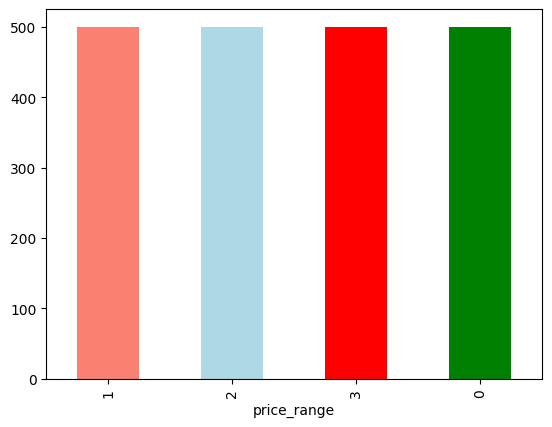

In [ ]:
data['price_range'].value_counts().plot(kind='bar',color=['salmon','lightblue','red','green'])

<Axes: xlabel='n_cores'>

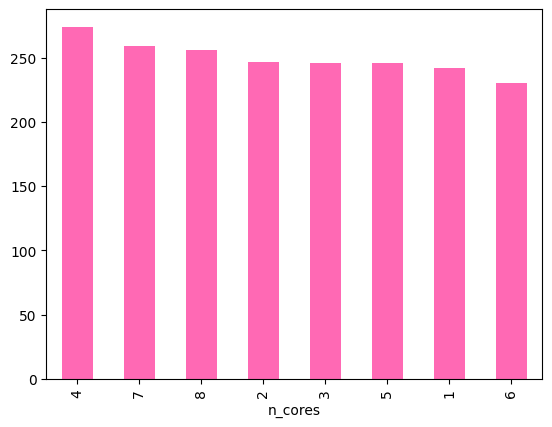

In [ ]:
data['n_cores'].value_counts().plot(kind='bar',color=['hotpink'])

<ipython-input-9-6f3d8447edff>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data["price_range"],
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


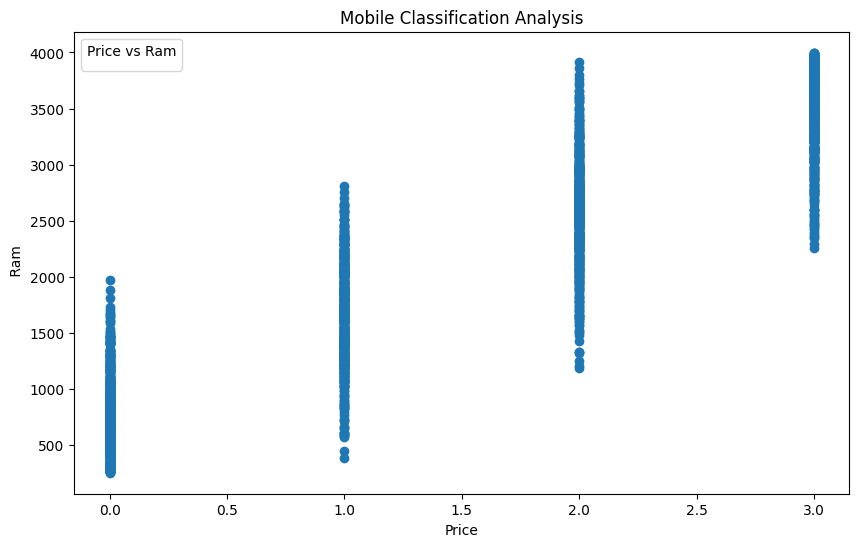

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))


scatter = ax.scatter(data["price_range"],
                      data["ram"],
                     cmap='winter')

ax.set(title="Mobile Classification Analysis",xlabel='Price',
        ylabel=" Ram")

ax.legend(*scatter.legend_elements(),title='Price vs Ram')

plt.show()

<ipython-input-10-afdf85c69f56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range',y='battery_power',data=data,palette="Paired")


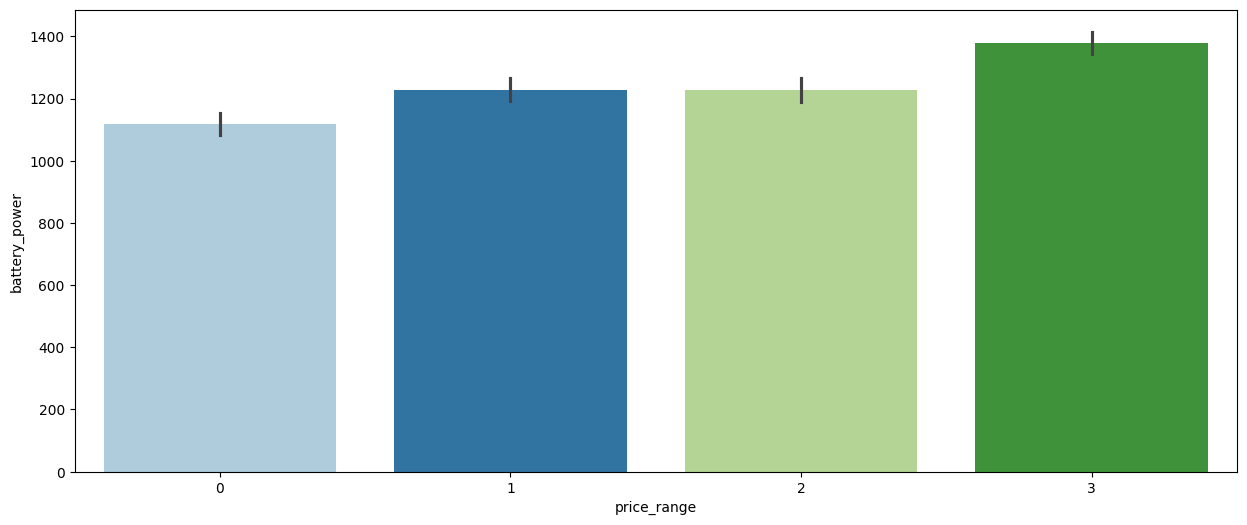

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='price_range',y='battery_power',data=data,palette="Paired")
plt.show()

In [ ]:
#@title Reference For Fig and Axes
"""
# MatplotLib using pyplot
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(14,10))
ax0.bar('price_range' ,'px_height',data=data,color=['lightsalmon'])
ax1.bar('price_range','px_width',data=data,color=['skyblue'])
ax0.set(title='Analysis', xlabel='Price range', ylabel='Height')
ax1.set(title='Analysis', xlabel='Price range', ylabel='Width')
plt.show()
"""

"\n# MatplotLib using pyplot\nfig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(14,10))\nax0.bar('price_range' ,'px_height',data=data,color=['lightsalmon'])\nax1.bar('price_range','px_width',data=data,color=['skyblue'])\nax0.set(title='Analysis', xlabel='Price range', ylabel='Height')\nax1.set(title='Analysis', xlabel='Price range', ylabel='Width')\nplt.show()\n"

<ipython-input-12-247578b0eed6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range',y='px_height',data=data,palette='Set1')
<ipython-input-12-247578b0eed6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range',y='px_width',data=data,palette='Set2')


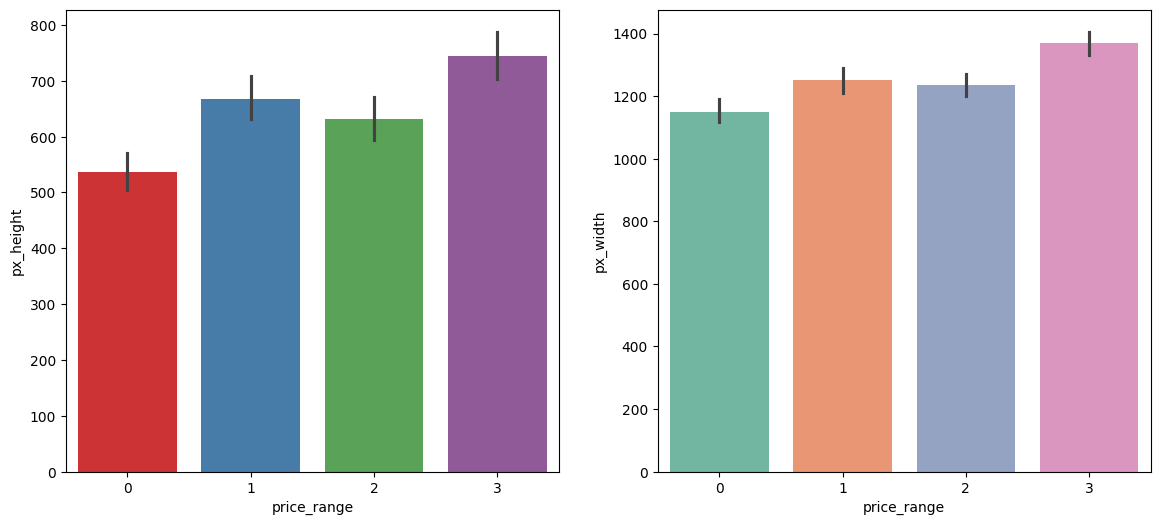

In [ ]:
# Using Seaborn
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=data,palette='Set1')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=data,palette='Set2')
plt.show()

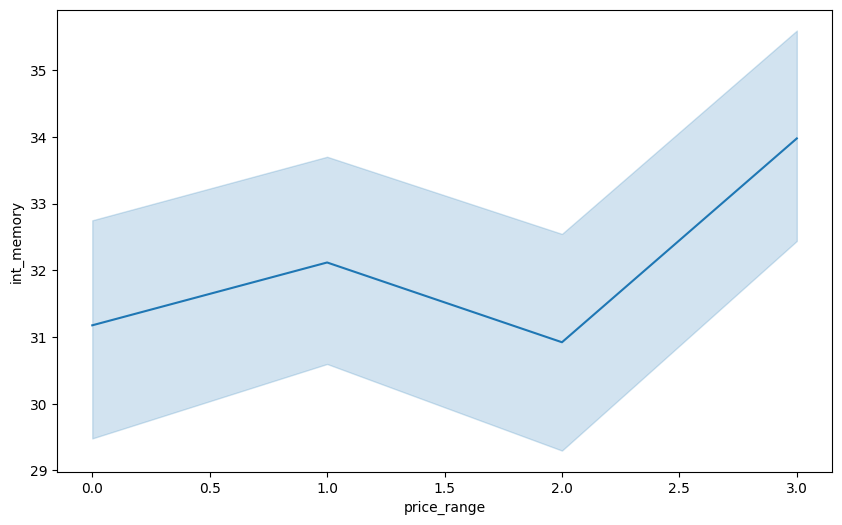

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='price_range',y='int_memory',data=data)
plt.show()

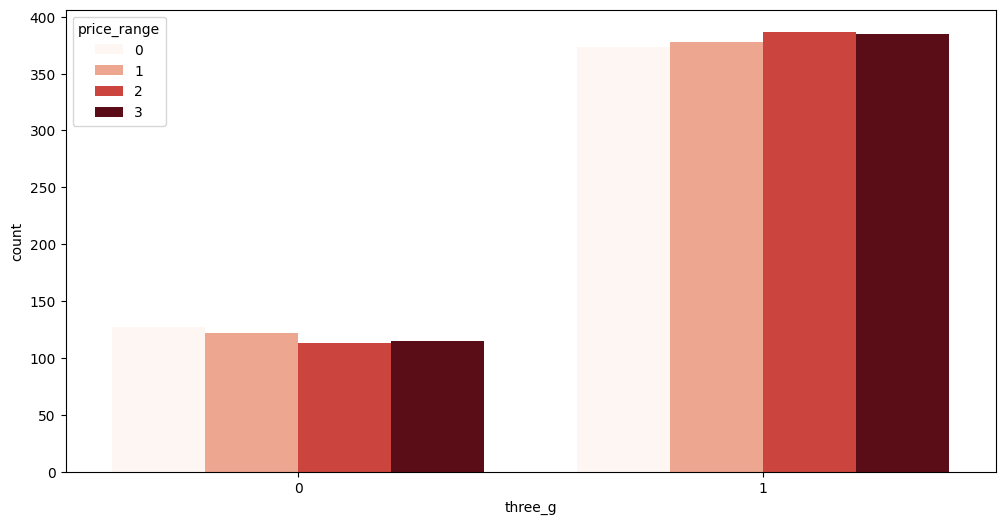

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='three_g', hue='price_range', data=data, palette='Reds')
plt.show()

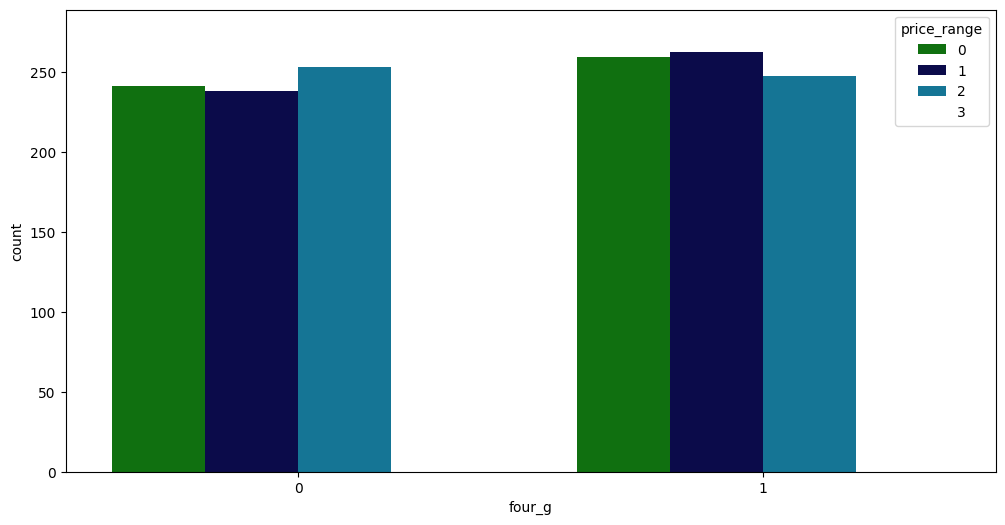

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'four_g',hue='price_range',data=data,palette='ocean')
plt.show()

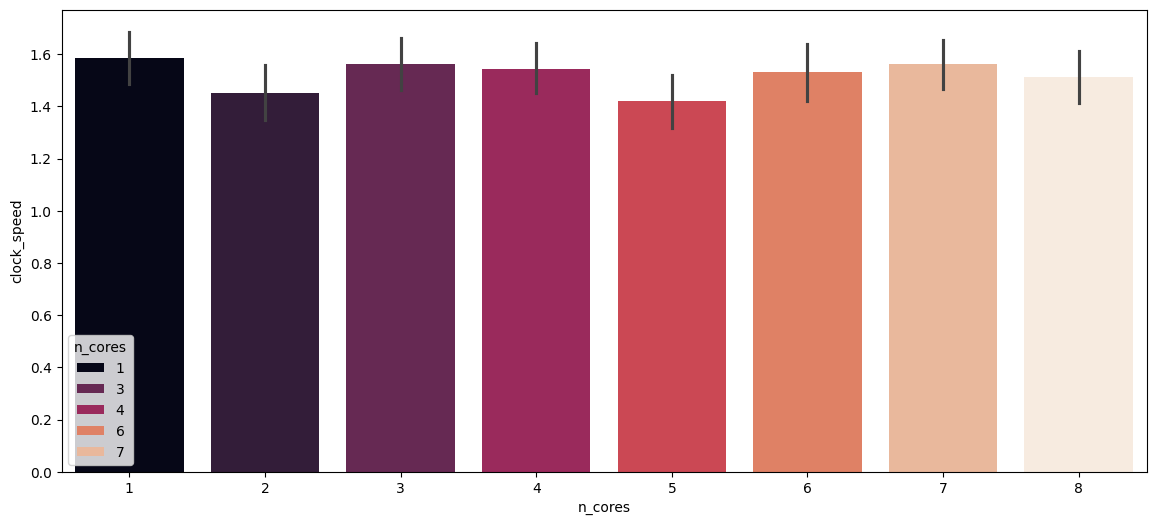

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='n_cores', y='clock_speed', data=data, hue='n_cores', palette='rocket')
plt.show()

# Correlation Matrix using Heatmap

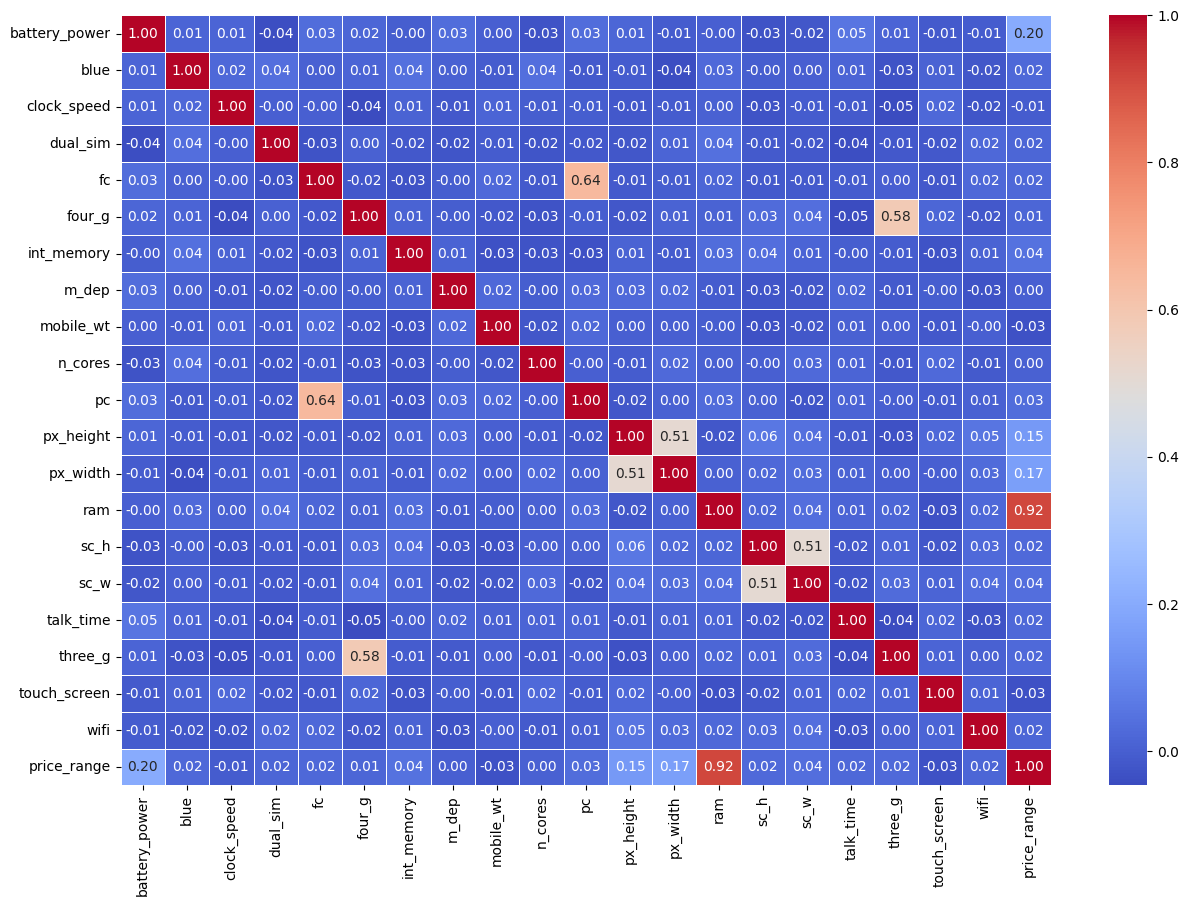

In [ ]:
corr_mat = data.corr()
fig , ax=plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_mat,annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='coolwarm')

# Model Building

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(columns=['price_range'])  # Drop dependent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Feature        VIF
0   battery_power   8.076717
1            blue   1.981927
2     clock_speed   4.260479
3        dual_sim   2.015006
4              fc   3.413529
5          four_g   3.194321
6      int_memory   3.961239
7           m_dep   3.911115
8       mobile_wt  12.972548
9         n_cores   4.646070
10             pc   6.228797
11      px_height   4.262680
12       px_width  11.766282
13            ram   4.688608
14           sc_h  11.510780
15           sc_w   3.720867
16      talk_time   4.859144
17        three_g   6.191783
18   touch_screen   1.989078
19           wifi   2.021012


In [ ]:
data.drop(columns=['fc', 'sc_w', 'px_width', 'three_g'], inplace=True)

In [ ]:
X = data.drop('price_range',axis=1)

y = data['price_range']

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,talk_time,touch_screen,wifi
0,842,0,2.2,0,0,7,0.6,188,2,2,20,2549,9,19,0,1
1,1021,1,0.5,1,1,53,0.7,136,3,6,905,2631,17,7,1,0
2,563,1,0.5,1,1,41,0.9,145,5,6,1263,2603,11,9,1,0
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,2769,16,11,0,0
4,1821,1,1.2,0,1,44,0.6,141,2,14,1208,1411,8,15,1,0


In [ ]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [ ]:
np.random.seed(42)

# split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building A Machine Learning Classification Model


*   Logistic Regression
*   Random Forest Classifier
*   K Nearest Neighbors









In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10),
}

In [ ]:
def fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        fitted_models[name] = model
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy
        print(f"\nModel: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    return model_scores, fitted_models

In [ ]:
model_scores, fitted_models = fit_and_score(models=models,
                             X_train_scaled=X_train_scaled,
                             X_test_scaled=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores, fitted_models


Model: Logistic Regression
Accuracy: 0.8900

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.85      0.87      0.86        91
           2       0.81      0.86      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


Model: KNN
Accuracy: 0.5150

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       105
           1       0.33      0.40      0.36        91
           2       0.41      0.47      0.44        92
           3       0.74      0.50      0.60       112

    accuracy                           0.52       400
   macro avg       0.53      0.51      0.51       400
weighted avg       0.54      0.52      0.52       400


Model: 

({'Logistic Regression': 0.89, 'KNN': 0.515, 'Random Forest': 0.835},
 {'Logistic Regression': LogisticRegression(),
  'KNN': KNeighborsClassifier(),
  'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200)})

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluate model performance using train, test, and overall accuracy.
    """
    # Train and Test Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy]
    })


# Collect results into a DataFrame
results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Format and display results
results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)



Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy
Model,,,
Logistic Regression,0.9212,0.890,0.9056
KNN,0.7088,0.515,0.6119
Random Forest,0.9994,0.835,0.9172


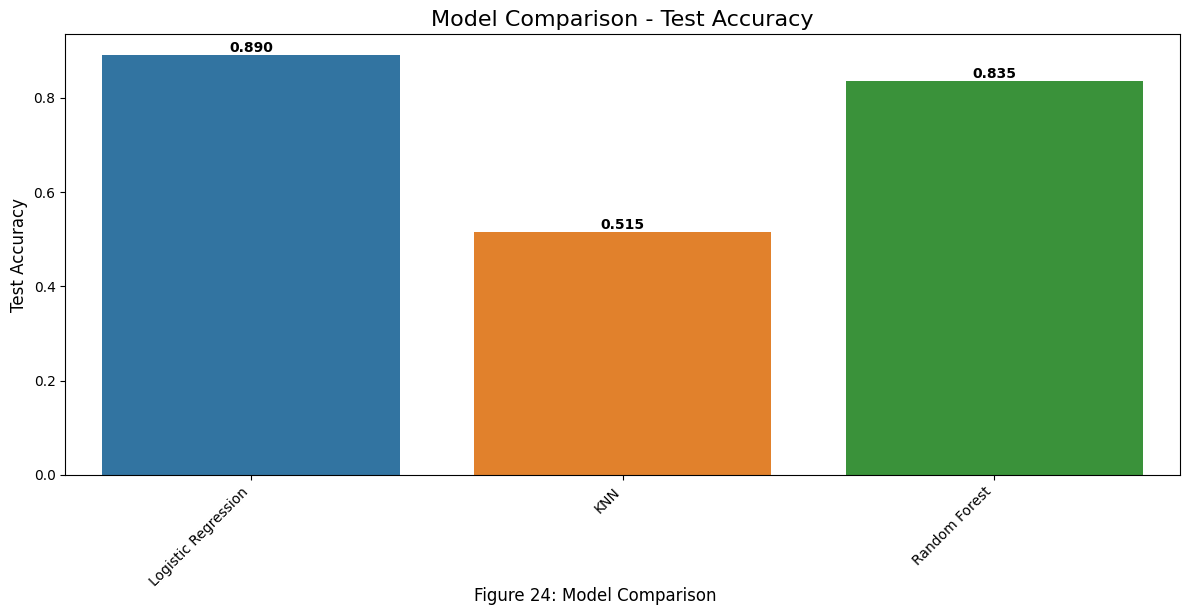

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)
plt.show()

# Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [ ]:
tuned_models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
            'p': [1, 2]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 75, 100],
            'max_depth': [5, 7, 10],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [5, 10, 15],
            'max_features': ['sqrt', 'log2']
        }
    }
}


In [ ]:
def fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}

    for name, model_info in tuned_models.items():
        print(f"\nOptimizing {name}...")

        # Perform RandomizedSearchCV for hyperparameter tuning
        random_search = RandomizedSearchCV(
            model_info['model'],
            model_info['params'],
            n_iter=20,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_

        # Save model and calculate accuracy
        fitted_models[name] = best_model
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy

        # Print results
        print(f"\nModel: {name}")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return model_scores, fitted_models

In [ ]:
# Starting hyperparameter tuning
print("Starting hyperparameter tuning...")
model_scores, fitted_models = fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test)

Starting hyperparameter tuning...

Optimizing Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Model: Logistic Regression
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.85      0.89      0.87        91
           2       0.83      0.88      0.85        92
           3       0.96      0.89      0.93       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


Optimizing KNN...

Model: KNN
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'metric': 'manhattan'}
Accuracy: 0.6475

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.50      0.52      0.51        91
           2       0.49      0.58      0.53        92
           3       0.82      0.71      0.77       112


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluate model performance using train, test, and overall accuracy.
    """
    # Train and Test Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy]
    })


# Collect results into a DataFrame
results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Format and display results
results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)



Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy
Model,,,
Logistic Regression,0.9200,0.9000,0.9100
KNN,1.0000,0.6475,0.8238
Random Forest,0.9619,0.8475,0.9047


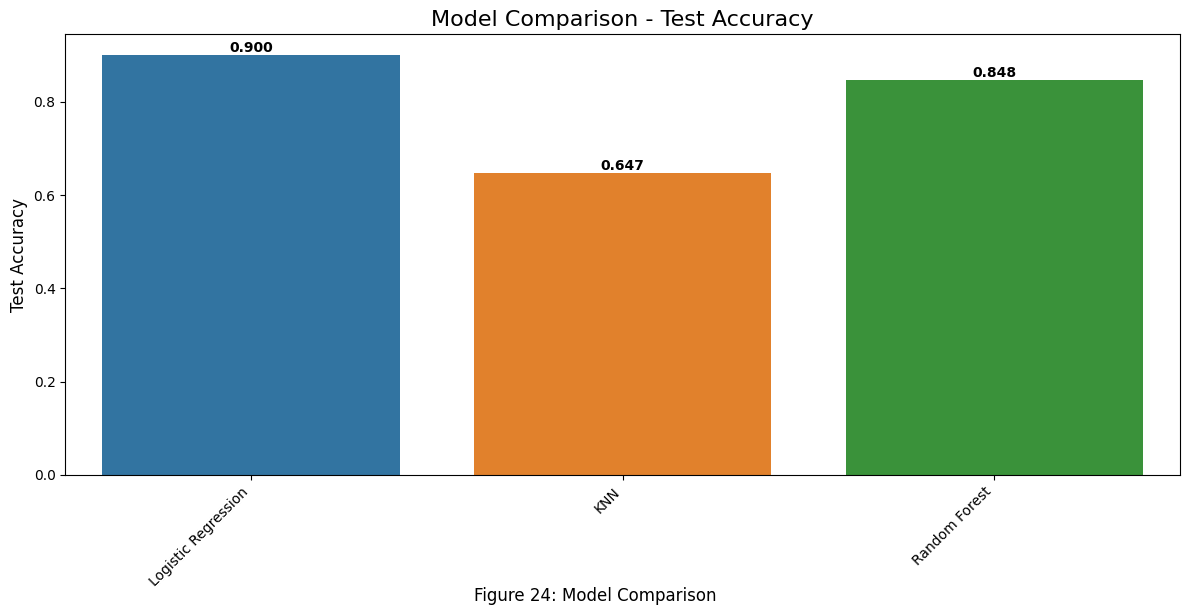

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})

# Create bar plot
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)

plt.show()

In [ ]:
# Get the best model (Logistic Regression based on the results)
best_model = fitted_models["Logistic Regression"]

# Save the Logistic Regression model
with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model Saved!")

Model Saved!


In [ ]:
with open('StandardScaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("StandardScaler Saved!")

StandardScaler Saved!


In [ ]:
tuned_models = {
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 75, 100],  # Number of trees
            'max_depth': [5, 7, 10],  # Tree depth to prevent overfitting
            'min_samples_split': [5, 10, 15],  # Minimum samples for a split
            'min_samples_leaf': [5, 10, 15],  # Minimum samples per leaf
            'max_features': ['sqrt', 'log2']  # Feature selection per split
        }
    },
    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of nearest neighbors
            'weights': ['uniform', 'distance'],  # Weighting method
            'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
            'p': [1, 2]  # Power parameter (1 = Manhattan, 2 = Euclidean)
        }
    }
}


In [ ]:
def fit_and_score_grid(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}

    for name, model_info in tuned_models.items():
        print(f"\n Optimizing {name} with GridSearchCV...")

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_

        # Save best model and compute accuracy
        fitted_models[name] = best_model
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy

        # Print results
        print(f"\n Model: {name}")
        print(f" Best parameters: {grid_search.best_params_}")
        print(f" Accuracy: {accuracy:.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred))

    return model_scores, fitted_models

In [ ]:
# Starting hyperparameter tuning
print("Starting hyperparameter tuning...")
model_scores, fitted_models = fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test)

Starting hyperparameter tuning...

Optimizing Random Forest...

Model: Random Forest
Best parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10}
Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.85      0.81      0.83        91
           2       0.73      0.77      0.75        92
           3       0.89      0.85      0.87       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400


Optimizing KNN...

Model: KNN
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'metric': 'manhattan'}
Accuracy: 0.6475

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.50      0.52      

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluate model performance using train, test, and overall accuracy.
    """
    # Train and Test Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy]
    })


# Collect results into a DataFrame
results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Format and display results
results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)


Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy
Model,,,
Random Forest,0.9612,0.8525,0.9069
KNN,1.0000,0.6475,0.8238


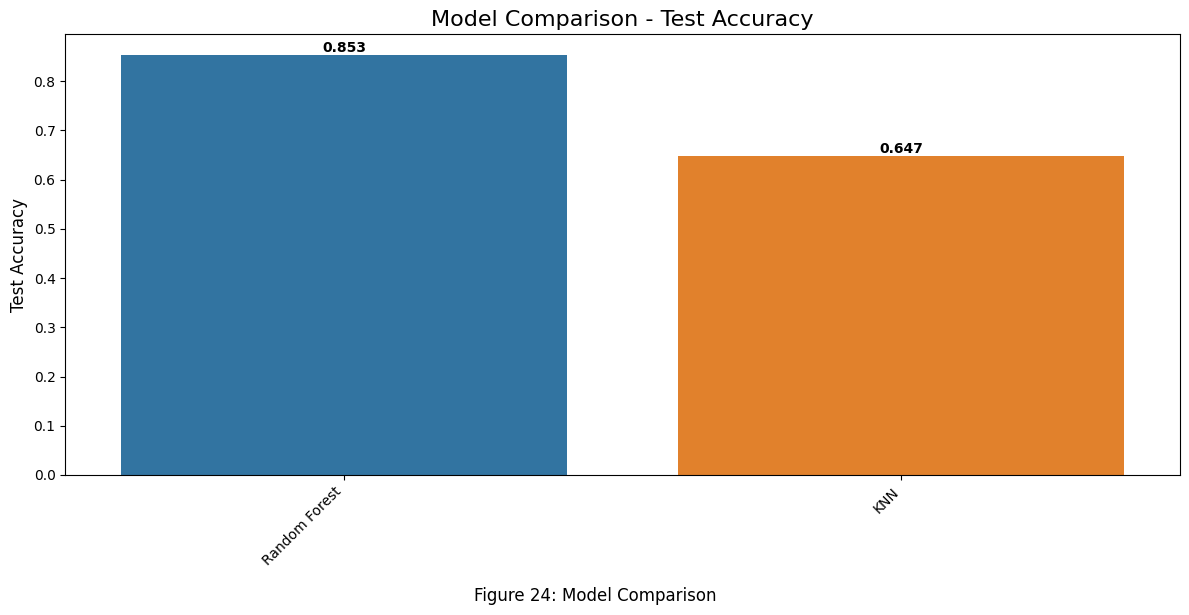

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})

# Create bar plot
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)

plt.show()

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
test.drop(columns=['id', 'fc', 'px_width', 'sc_w', 'three_g'], inplace=True)

test.head(1)

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,talk_time,touch_screen,wifi
0,1043,1,1.8,1,0,5,0.1,193,3,16,226,3476,12,2,1,0


In [ ]:
with open('LogisticRegression.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the scaler
with open('StandardScaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [ ]:
expected_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
                     'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                     'ram', 'sc_h', 'talk_time', 'touch_screen', 'wifi']

# 🔹 Reorder test dataset columns to match training data
test = test.reindex(columns=expected_features)

# 🔹 Scale the test data
test_scaled = scaler.transform(test)

# 🔹 Convert Scaled Data Back to DataFrame with Feature Names
test_scaled_df = pd.DataFrame(test_scaled, columns=expected_features)

# 🔹 Predict using the trained model
test['price_range'] = model.predict(test_scaled_df)

# Display sample predictions
print("\nSample Predictions on Test Data:")
print(test[['ram', 'int_memory', 'price_range']].head())  # Display some sample results


Sample Predictions on Test Data:
    ram  int_memory  price_range
0  3476           5            2
1  3895          61            3
2  2396          27            2
3  3893          25            3
4  1773          49            1
